In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t , sem
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('/content/walmart_data.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Non-Graphical Analysis: Value counts and unique attributes ​


In [ ]:
print("Value Counts:")
print(df['Gender'].value_counts())
print(df['Age'].value_counts())
print(df['City_Category'].value_counts())
print(df['Stay_In_Current_City_Years'].value_counts())
print(df['Marital_Status'].value_counts())


Value Counts:
Gender
M    414259
F    135809
Name: count, dtype: int64
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64
Marital_Status
0    324731
1    225337
Name: count, dtype: int64


Visual Analysis - Univariate & Bivariate:

Converting numerical datatype to categorical datatype

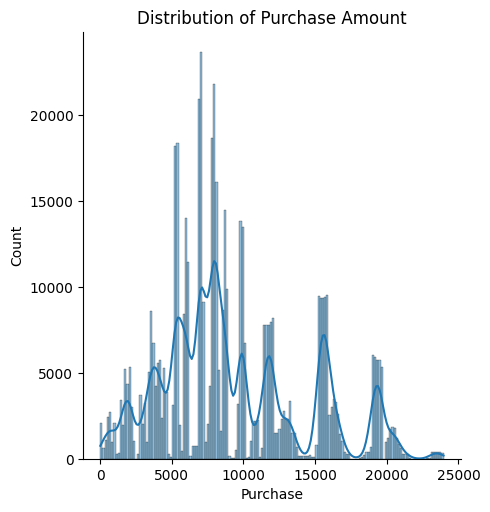

In [ ]:
# Continuous Variables - Univariate Analysis
sns.displot(df['Purchase'], kde=True)
plt.title('Distribution of Purchase Amount')
plt.show()




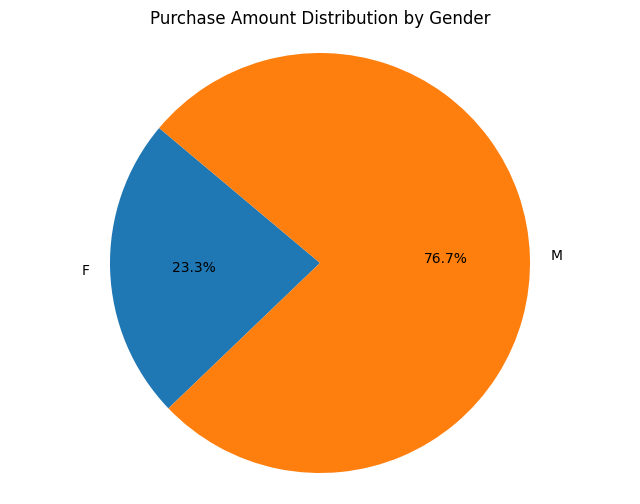

In [ ]:
gender_purchase_total = df.groupby('Gender')['Purchase'].sum()

plt.figure(figsize=(8, 6))
plt.pie(gender_purchase_total, labels=gender_purchase_total.index, autopct='%1.1f%%', startangle=140)
plt.title('Purchase Amount Distribution by Gender')
plt.axis('equal')
plt.show()



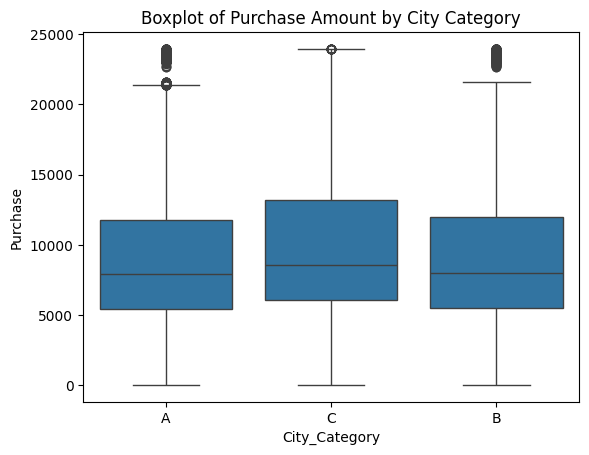

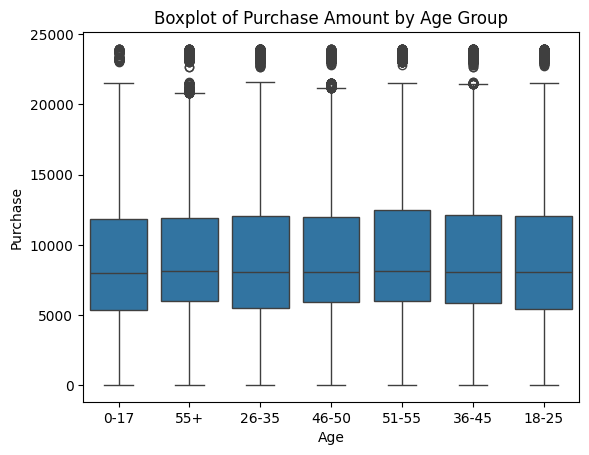

In [ ]:

sns.boxplot(data=df, x='City_Category', y='Purchase')
plt.title('Boxplot of Purchase Amount by City Category')
plt.show()

sns.boxplot(data=df, x='Age', y='Purchase')
plt.title('Boxplot of Purchase Amount by Age Group')
plt.show()



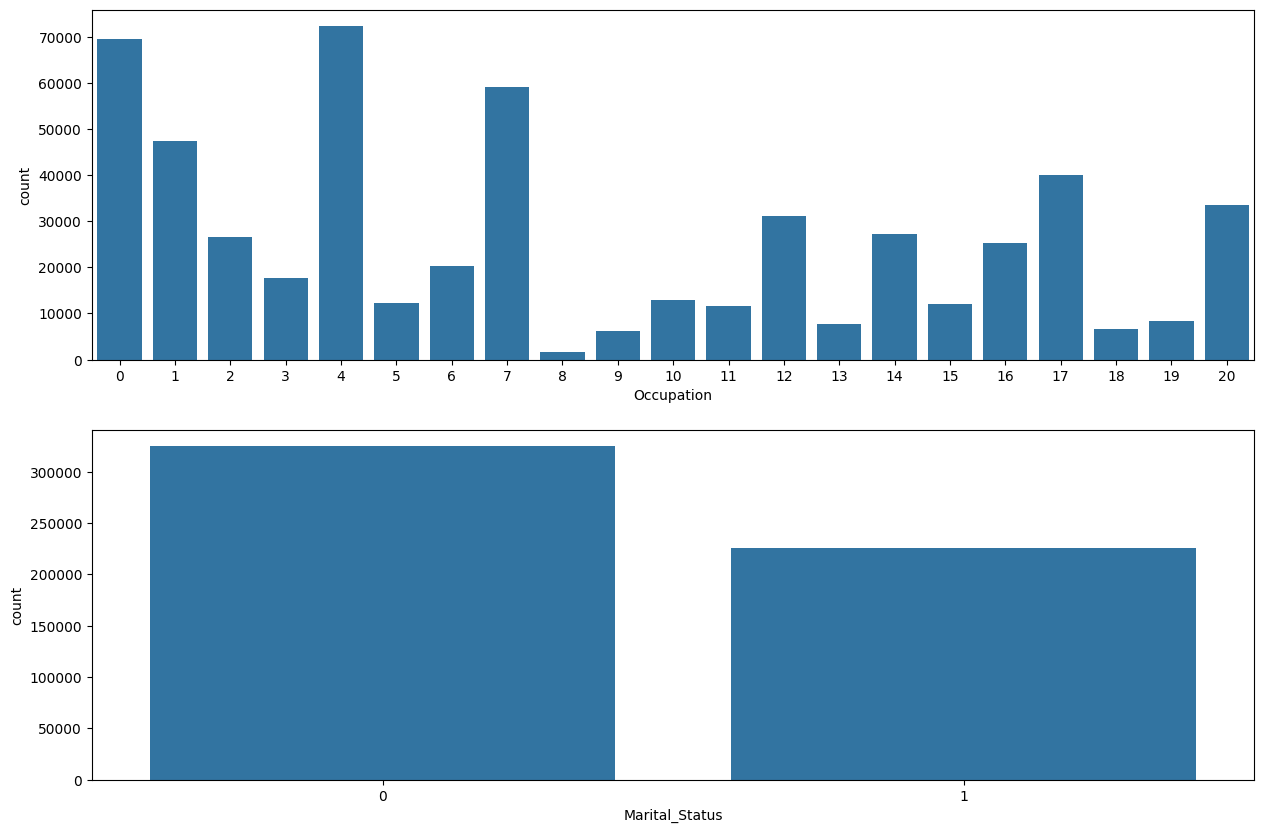

In [ ]:


fig, axs = plt.subplots(nrows=2, figsize=(15, 10))
sns.countplot(data=df, x='Occupation', ax=axs[0])
sns.countplot(data=df, x='Marital_Status',  ax=axs[1])
plt.show()

In [ ]:
df[['Occupation'  , 'Product_Category']] = df[['Occupation'  , 'Product_Category']].astype('object')
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category              object
Purchase                       int64
dtype: object

Null Values

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df[df.isnull().any(axis =1)]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.describe()

,User_ID,Marital_Status,Purchase
count,5.500680e+05,550068.000000,550068.000000
mean,1.003029e+06,0.409653,9263.968713
std,1.727592e+03,0.491770,5023.065394
min,1.000001e+06,0.000000,12.000000
25%,1.001516e+06,0.000000,5823.000000
50%,1.003077e+06,0.000000,8047.000000
75%,1.004478e+06,1.000000,12054.000000
max,1.006040e+06,1.000000,23961.000000


Outliers

In [ ]:
continuous_varibales = df.select_dtypes(include =['int64' , 'float64']).columns

<Axes: xlabel='Purchase'>

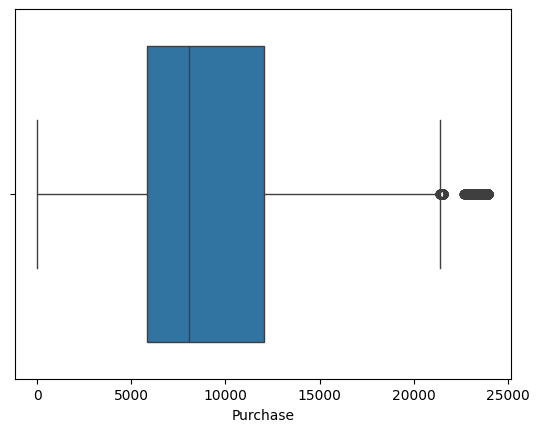

In [ ]:
sns.boxplot(data = df , x = df['Purchase'])

In [ ]:
outlier = []
def detect_outliers(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  Lower_fence = Q1 - 1.5*IQR
  Upper_fence = Q3 + 1.5*IQR

  is_outlier = (data > Upper_fence) | (data < Lower_fence)
  outlier = data[is_outlier]
  print(Lower_fence , Upper_fence)

  return outlier


In [ ]:
detect_outliers(df['Purchase'])

-3523.5 21400.5


343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64

np.clip

In [ ]:
percentile_5 = df['Purchase'].quantile(0.05)
percentile_95 = df['Purchase'].quantile(0.95)

In [ ]:
df['Purchase']  = np.clip(df['Purchase'] , percentile_5 , percentile_95)

In [ ]:
detect_outliers(df['Purchase'])

-3523.5 21400.5


Series([], Name: Purchase, dtype: int64)

Data Exploration

Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [ ]:
#Filtering data

female = df[df['Gender'] == 'F']
male = df[df['Gender'] == 'M']

In [ ]:
# Calculate the avg spening for male and female
avg_spend_female = female['Purchase'].mean()
avg_spend_male = male['Purchase'].mean()
print(f'average spend Female : {avg_spend_female} , average spend Male : {avg_spend_male}')

average spend Female : 8736.540266109021 , average spend Male : 9427.240996574606



Calculate Confidence Intervals

In [ ]:

std_female = female['Purchase'].std()
std_male = male['Purchase'].std()

print(f'Standard deviation for female customer :{std_female} , male customer: {std_male}')

Standard deviation for female customer :4596.98461352269 , male customer: 4925.953492284638


In [ ]:
# Calculate sample size
sample_female = len(female)
sample_male = len(male)

print(f'Sample size for female customer :{sample_female} , male customer: {sample_male}')

Sample size for female customer :135809 , male customer: 414259


In [ ]:
#Calculate standard error
se_female = std_female/ np.sqrt(sample_female)
se_male = std_male / np.sqrt(sample_male)
print(f'Standard error for female customer :{se_female} , male customer: {se_male}')

Standard error for female customer :12.474087164948806 , male customer: 7.653398570983641


In [ ]:
#Set the confident level (95%)
confidence_level = 0.95

In [ ]:
#Calucating margin of error using the z-score
z_score = norm.ppf((1+ confidence_level)/2)
z_score

1.959963984540054

In [ ]:
margin_error_female = z_score * se_female
margin_error_male = z_score * se_male

In [ ]:
ci_female = (avg_spend_female - margin_error_female, avg_spend_female + margin_error_female)
ci_male = (avg_spend_male - margin_error_male, avg_spend_male + margin_error_male)

print("95% Confidence Interval for average spending of female customers:", ci_female)
print("95% Confidence Interval for average spending of male customers:", ci_male)

95% Confidence Interval for average spending of female customers: (8712.091504525708, 8760.989027692334)
95% Confidence Interval for average spending of male customers: (9412.240611016148, 9442.241382133065)


What products are different age groups buying?

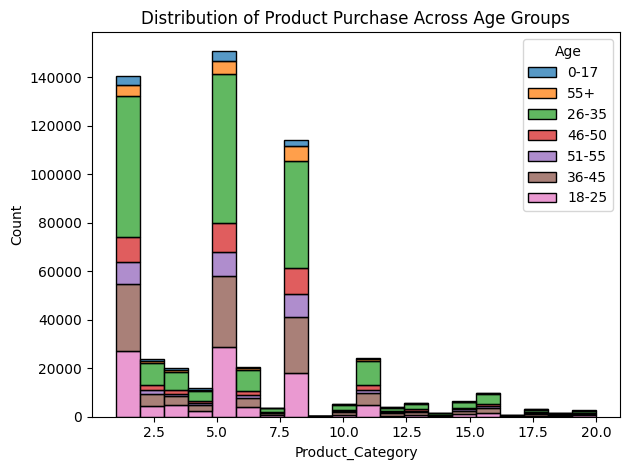

In [ ]:
sns.histplot(data = df , x = 'Product_Category' , hue = 'Age' , multiple = 'stack'  , bins =20)
plt.title('Distribution of Product Purchase Across Age Groups')
plt.tight_layout()
plt.show()

Is there a relationship between age, marital status, and the amount spent?

In [ ]:
grouped_data = df.groupby(['Age' , 'Marital_Status'])['Purchase'].mean().reset_index()

In [ ]:
grouped_data

,Age,Marital_Status,Purchase
0,0-17,0,8940.649053
1,18-25,0,9215.764183
2,18-25,1,8995.105702
3,26-35,0,9242.877723
4,26-35,1,9245.174074
5,36-45,0,9393.742155
6,36-45,1,9215.193533
7,46-50,0,8951.386840
8,46-50,1,9301.401654
9,51-55,0,9545.115509


In [ ]:
heatmap_data = grouped_data.pivot_table(index = 'Age', columns = 'Marital_Status', values = 'Purchase')

In [ ]:
heatmap_data

Marital_Status,0,1
Age,,
0-17,8940.649053,NaN
18-25,9215.764183,8995.105702
26-35,9242.877723,9245.174074
36-45,9393.742155,9215.193533
46-50,8951.386840,9301.401654
51-55,9545.115509,9503.009291
55+,9532.120512,9209.546362


<Axes: xlabel='Marital_Status', ylabel='Age'>

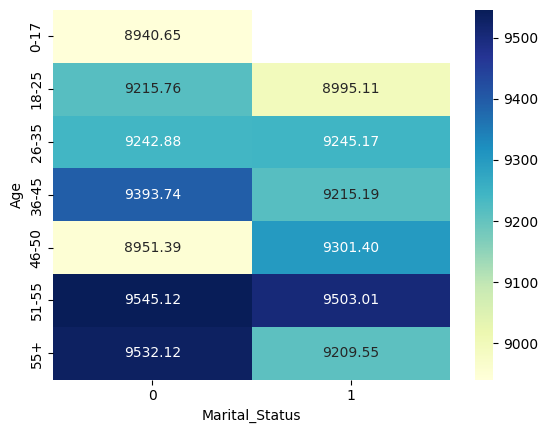

In [ ]:
sns.heatmap(heatmap_data, annot = True , cmap = 'YlGnBu', fmt = '.2f')

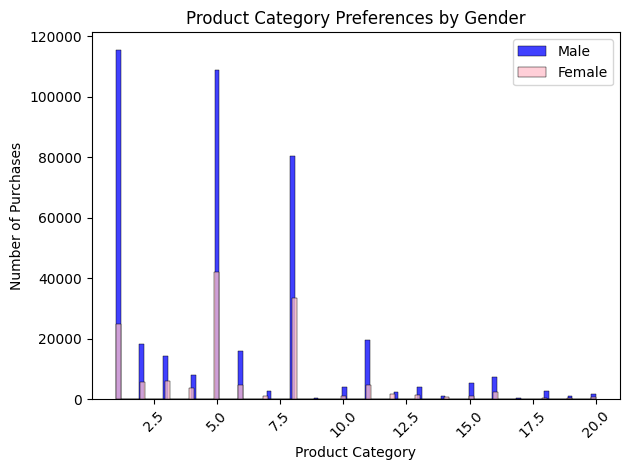

In [ ]:
sns.histplot(data=df[df['Gender'] == 'M'], x='Product_Category', stat='count', label='Male', color='blue')
sns.histplot(data=df[df['Gender'] == 'F'], x='Product_Category', stat='count', label='Female', color='pink')

plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.title('Product Category Preferences by Gender')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

How does gender affect the amount spent?

In [ ]:
def compute_ci(data, sample_size):
    sample_means = []
    for _ in range(1000):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))


    mean_boot = np.mean(sample_means)
    std_err_boot = np.std(sample_means, ddof=1)


    z_score = norm.ppf(0.975)  # 95% confidence interval
    lower_ci = mean_boot - z_score * std_err_boot
    upper_ci = mean_boot + z_score * std_err_boot

    return lower_ci, upper_ci

sample_sizes = [len(df), 300, 3000, 30000]
gender_ci = {}

for size in sample_sizes:

    sample_data = df['Purchase'].sample(size, replace=True)
    male_data = sample_data[df['Gender'] == 'M']
    female_data = sample_data[df['Gender'] == 'F']


    lower_ci_male, upper_ci_male = compute_ci(male_data, size)
    lower_ci_female, upper_ci_female = compute_ci(female_data, size)


    gender_ci[size] = {
        'Male': (lower_ci_male, upper_ci_male),
        'Female': (lower_ci_female, upper_ci_female)
    }


for size, ci in gender_ci.items():
    print(f"Sample Size: {size}")
    print(f"Male CI: {ci['Male']}")
    print(f"Female CI: {ci['Female']}")
    print()

Sample Size: 550068
Male CI: (9419.722029539864, 9445.586523177257)
Female CI: (8723.871130177187, 8747.945724553501)

Sample Size: 300
Male CI: (8855.116578104167, 9986.363455229162)
Female CI: (8388.845793079709, 9442.700526920293)

Sample Size: 3000
Male CI: (9158.347665743468, 9498.446506923197)
Female CI: (8755.019118981772, 9083.336805684894)

Sample Size: 30000
Male CI: (9333.483308780133, 9443.737784219868)
Female CI: (8632.433631749007, 8734.734845384328)




***i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?***

Yes, the confidence interval computed using the entire dataset is wider for males compared to females. This could be due to several reasons, including:
Variability in purchase amounts: If there is higher variability (more spread out data) in the purchase amounts for males compared to females, it can result in a wider confidence interval.

***ii. How is the width of the confidence interval affected by the sample size?***

As the sample size increases, the width of the confidence interval generally decreases. This is because larger sample sizes provide more information and reduce the uncertainty in estimating the population mean. In your output, you can observe that as the sample size increases from 300 to 30000, the width of the confidence intervals for both genders decreases.

***iii. Do the confidence intervals for different sample sizes overlap?***

Yes, the confidence intervals for different sample sizes overlap.

***iv. How does the sample size affect the shape of the distributions of the means?***

Increasing the sample size tends to make the distribution of sample means more closely resemble a normal distribution. This is a key principle of the central limit theorem (CLT). As sample size increases, the means of random samples drawn from the population tend to follow a normal distribution.

How does Marital_Status affect the amount spent?

In [ ]:
# Define a function to compute confidence intervals using bootstrapping and CLT
def compute_ci(data, sample_size):
    sample_means = []
    for _ in range(1000):  # Perform 1000 bootstrap samples
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))

    # Compute mean and standard error of bootstrap sample means
    mean_boot = np.mean(sample_means)
    std_err_boot = np.std(sample_means, ddof=1)

    # Compute 95% confidence interval using the normal distribution (CLT)
    z_score = norm.ppf(0.975)  # 95% confidence interval
    lower_ci = mean_boot - z_score * std_err_boot
    upper_ci = mean_boot + z_score * std_err_boot

    return lower_ci, upper_ci

# Compute confidence intervals for different sample sizes
sample_sizes = [len(df), 300, 3000, 30000]
marital_status_ci = {}

for size in sample_sizes:
    # Filter data based on sample size
    sample_data = df['Purchase'].sample(size, replace=True)

    # Compute confidence interval for marital status (example assuming 1 for married, 0 for unmarried)
    married_data = sample_data[df['Marital_Status'] == 1]
    unmarried_data = sample_data[df['Marital_Status'] == 0]

    # Compute confidence intervals for married and unmarried
    lower_ci_married, upper_ci_married = compute_ci(married_data, size)
    lower_ci_unmarried, upper_ci_unmarried = compute_ci(unmarried_data, size)

    # Store confidence intervals in dictionary
    marital_status_ci[size] = {
        'Married': (lower_ci_married, upper_ci_married),
        'Unmarried': (lower_ci_unmarried, upper_ci_unmarried)
    }

# Print confidence intervals for each sample size and marital status
for size, ci in marital_status_ci.items():
    print(f"Sample Size: {size}")
    print(f"Married CI: {ci['Married']}")
    print(f"Unmarried CI: {ci['Unmarried']}")
    print()


Sample Size: 550068
Married CI: (9230.687233987363, 9255.825295798044)
Unmarried CI: (9241.608461476622, 9266.823661373644)

Sample Size: 300
Married CI: (8911.633146672228, 10101.744719994438)
Unmarried CI: (8970.974427468762, 10111.870245864575)

Sample Size: 3000
Married CI: (8933.107710952745, 9260.630424380588)
Unmarried CI: (9178.793868462404, 9535.95153620426)

Sample Size: 30000
Married CI: (9229.580844708027, 9337.111471291973)
Unmarried CI: (9222.336781756838, 9334.82054144316)



Are women spending more money per transaction than men? Why or Why not?

In [ ]:
# Filter data for male and female customers
male_data = df[df['Gender'] == 'M']['Purchase']
female_data = df[df['Gender'] == 'F']['Purchase']

# Calculate mean and standard deviation for each gender
mean_male = np.mean(male_data)
std_male = np.std(male_data, ddof=1)
mean_female = np.mean(female_data)
std_female = np.std(female_data, ddof=1)

# Calculate t-statistic and p-value
n_male = len(male_data)
n_female = len(female_data)
df = n_male + n_female - 2  # Degrees of freedom
std_pooled = np.sqrt(((n_male - 1) * std_male ** 2 + (n_female - 1) * std_female ** 2) / df)
t_statistic = (mean_male - mean_female) / (std_pooled * np.sqrt(1 / n_male + 1 / n_female))
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

print("Mean Spending (Male):", mean_male)
print("Mean Spending (Female):", mean_female)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in spending between male and female customers.")
    if mean_male > mean_female:
        print("Men spend more money per transaction than women.")
    else:
        print("Women spend more money per transaction than men.")
else:
    print("There is no significant difference in spending between male and female customers.")


Mean Spending (Male): 9427.240996574606
Mean Spending (Female): 8736.540266109021
T-Statistic: 45.574933432542736
P-Value: 0.0
There is a significant difference in spending between male and female customers.
Men spend more money per transaction than women.


Confidence intervals and distribution of the mean of the expenses by female and male customers

In [ ]:
# Calculate confidence intervals for male and female spending
alpha = 0.05  # 95% confidence level
t_critical = t.ppf(1 - alpha / 2, df)
ci_male = (mean_male - t_critical * std_male / np.sqrt(n_male), mean_male + t_critical * std_male / np.sqrt(n_male))

ci_female = (mean_female - t_critical * std_female / np.sqrt(n_female), mean_female + t_critical * std_female / np.sqrt(n_female))

print("Confidence Interval (Male):", ci_male)
print("Confidence Interval (Female):", ci_female)


Confidence Interval (Male): (9412.240578009243, 9442.24141513997)
Confidence Interval (Female): (8712.09145072856, 8760.989081489482)


Overlapping confidence intervals and implications


In [ ]:
if ci_male[1] > ci_female[0] and ci_female[1] > ci_male[0]:
    print("Confidence intervals of average male and female spending overlap.")
else:
    print("Confidence intervals of average male and female spending do not overlap.")

Confidence intervals of average male and female spending do not overlap.


Results for Married vs Unmarried

In [ ]:
df['Marital_Status'] = df['Marital_Status'].astype(int)
married_data = df[df['Marital_Status'] == 1]['Purchase']
unmarried_data = df[df['Marital_Status'] == 0]['Purchase']

mean_married = np.mean(married_data)
mean_unmarried = np.mean(unmarried_data)

t_statistic_marital, p_value_marital = ttest_ind(married_data, unmarried_data)

if p_value_marital < 0.05:
    if mean_married > mean_unmarried:
        print("Married customers spend more money per transaction than unmarried customers.")
    else:
        print("Unmarried customers spend more money per transaction than married customers.")
else:
    print("No significant difference in spending between married and unmarried customers.")

No significant difference in spending between married and unmarried customers.


Results for Age groups

In [ ]:
age_groups = df['Age'].unique()

for age_group in age_groups:
    age_group_data = df[df['Age'] == age_group]['Purchase']
    mean_age_group = age_group_data.mean()
    ci_age_group = t.interval(0.95, len(age_group_data)-1, loc=mean_age_group, scale=sem(age_group_data))
    print(f"Age Group: {age_group}")
    print(f"Mean Spending: {mean_age_group}")
    print(f"Confidence Interval: {ci_age_group}")


Age Group: 0-17
Mean Spending: 8933.464640444974
Confidence Interval: (8851.941436361221, 9014.987844528727)
Age Group: 55+
Mean Spending: 9336.280459449405
Confidence Interval: (9269.295063935433, 9403.265854963376)
Age Group: 26-35
Mean Spending: 9252.690632869888
Confidence Interval: (9231.733560884022, 9273.647704855754)
Age Group: 46-50
Mean Spending: 9208.625697468327
Confidence Interval: (9163.08393647555, 9254.167458461105)
Age Group: 51-55
Mean Spending: 9534.808030960236
Confidence Interval: (9483.989875153999, 9585.626186766473)
Age Group: 36-45
Mean Spending: 9331.350694917874
Confidence Interval: (9301.669084404875, 9361.032305430872)
Age Group: 18-25
Mean Spending: 9169.663606261289
Confidence Interval: (9138.40756914702, 9200.919643375557)
